# Dipole experiments

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
#
# https://stackoverflow.com/questions/36816537/spherical-coordinates-plot-in-matplotlib 
#

---
** Modified    By    Reason **
   29-Dec-21   CBL   Adding in calls to get data
---

In [17]:
class DipoleSim():
    def __init__(self):
        # , arrange is (start,stop,step,dtype)
        x = np.arange(0, 1.0, 0.02)  # A single cycle
        theta = 2.0 * np.pi * x
        phi   = np.pi * x
        # 
        # Create a mesh grid
        #
        self.THETA,self.PHI = np.meshgrid(theta,phi)
        self.Flux = 1.0        # arbitrary units
        #
        # Dipole response
        self.R = self.Flux*pow(np.cos(self.PHI),2.0)
        self.X = self.R * np.sin(self.PHI) * np.cos(self.THETA)
        self.Y = self.R * np.sin(self.PHI) * np.sin(self.THETA)
        self.Z = self.R * np.cos(self.PHI)
        
    def Draw(self):
        # Make a plot of the current figure. 
        # This really plots only the basic shape, not the actual response. 
        fig = plt.figure()
        ax  = fig.add_subplot(1,1,1, projection='3d')
        plot = ax.plot_surface(
            self.X, self.Y, self.Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
            linewidth=0, antialiased=False, alpha=0.5)
        plt.show()

    def Response(self, X,Y,Z):
        # given an X,Y,Z position, return the magnitude of the vector field. 
        r2 = X*X + Y*Y
        R  = math.sqrt(r2 + Z*Z)
        r  = math.sqrt(r2)
        Phi   = math.acos(r/R)
        Theta = math.acos(X/r)
        
        # absolute magnitude falls off as 1/R^3
        magnitude = self.Flux * math.pow(r/R,2.0) * 1.0/math.pow(R,3.0)
        PhiX = magnitude * math.sin(Phi)*math.cos(Theta)
        PhiY = magnitude * math.sin(Phi)*math.sin(Theta)
        PhiZ = magnitude * math.cos(Phi)
        return [PhiX,PhiY,PhiZ]

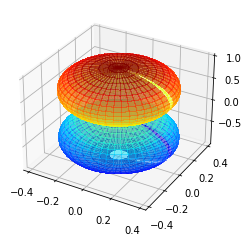

[0.04907693777777317, 0.09815387555554632, 0.1226923444444329]

In [19]:
sim = DipoleSim()
sim.Draw()
B = sim.Response(0.5, 1.0, 1.0)
B